In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual
from putils import *

# Ecuacion diferencial lineal en 2D

Un flujo 2D en el plano $(x,y)$ de forma general esta dado por las ecuaciones diferenciales:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

donde $f$ y $g$ son dos funciones de dos variables que tambien pueden verse como una **funcion vectorial** o un **campo vector**
Para el caso en el que $f$ y $g$ son funciones lineales podemos escribir de forma general:

$\dot{x} = ax+by$

$\dot{y} = cx+by$

O de forma mas compacta usando notacion matricial

${\bf \dot{x}} = {\bf Ax}$

donde

$
{\bf x} = 
\begin{pmatrix}
x\\
y
\end{pmatrix}
\quad
{\bf A} =
\begin{pmatrix}
a & b\\
c & d
\end{pmatrix}
$

Cualquier termino constante que se agregue a las forma anterior se puede eliminar haciendo un cambio **lineal** de coordenadas por lo tanto decimos que esta es la forma general de un flujo 2D lineal, con un punto fijo en el origen.

Dependiendo de los autovalores de la matriz $A$ ese punto fijo puede ser atractor (nodo o espiral), repulsor (nodo o espiral), punto silla (saddle) o un centro. Vamos a ver los casos uno por uno

## Autovalores y Autovectores

Para el caso de matrices de 2x2 la ecuacion caracteristica para el calculo de los autovalores $det({\bf A} - \lambda{\bf I}) = 0$ se puede escribir como:

$\lambda^2-\tau\lambda+\Delta=0$

donde $\tau$ es la traza de la matriz ${\bf A}$, es decir $\tau=a+d$,

y $\Delta$ es el determinante de la matriz ${\bf A}$, es decir $\Delta=ad-bc$

Por lo tanto los dos autovalores de la matriz son:

$\lambda_1 = \frac{\tau+\sqrt{\tau^2-4\Delta}}{2} \quad \quad \lambda_2 = \frac{\tau-\sqrt{\tau^2-4\Delta}}{2}$ 

## Nodo atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores reales negativos tenemos un nodo atractor. Por ejemplo:

$\dot{x} = -x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A} =
\begin{pmatrix}
-1 & 1\\
1 & -2
\end{pmatrix}
$

La traza es -3 y el determinante 1. Por lo tanto
sus autovalores son ambos reales negativos $\lambda_1=(-3+\sqrt{5})/2=-0.38197$ $\lambda_2=(-3+\sqrt{5})/2=-2.61803$

Los autovalores los podemos calcular numericamente tambien usando la funcion *eig* del modulo de algebra lineal de numpy

In [10]:
av, _ = np.linalg.eig(np.array([[-1,1],[1,-2]]))
print(av)

[-0.38196601 -2.61803399]


In [11]:
#definimos la ed
def nodoat(t, x):
    return[
        -x[0]+x[1],
        x[0]-2*x[1]
    ]

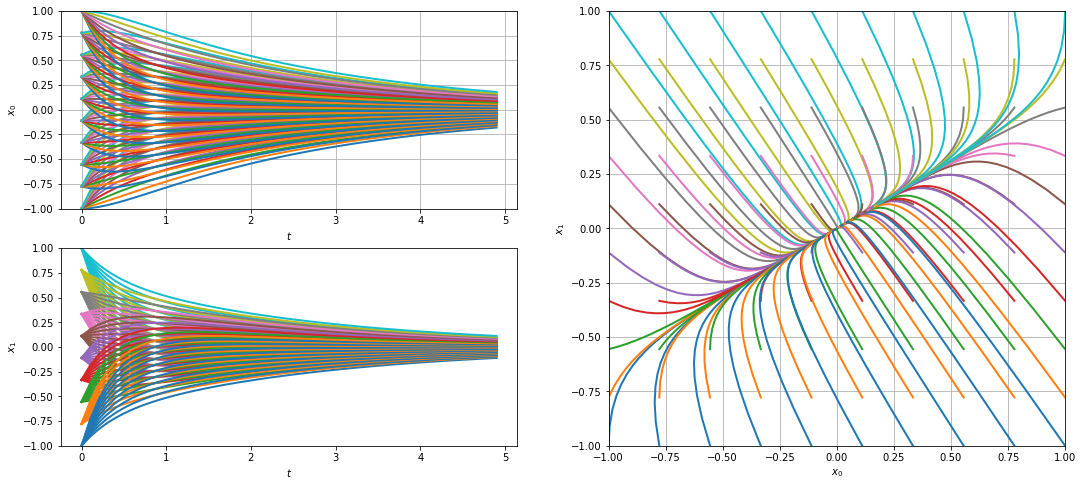

In [12]:
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,10) for y0 in np.linspace(-1,1,10)]
dt = 0.1
tmax = 5
pars={}
solve_plot2D_multiple(nodoat,pars,xini_array,tmax,dt,ranges=[[-1,1],[-1,1]],method='RK45')

Notar que tiende hacia el punto fijo mas rapido en una direccion y mas lentamente en la otra, esto es debido 
a que uno de los autovalores es unas siete veces mayor que el otro, la direccion en rapida y la lenta estan dadas 
por los autovectores asociados a los autovalores

In [13]:
av, avec = np.linalg.eig(np.array([[-1,1],[1,-2]]))
print('Primer autovalor y su autovector asociado')
print(av[0])
print(avec[:,0])
print('Segundo autovalor y su autovector asociado')
print(av[1])
print(avec[:,1])

Primer autovalor y su autovector asociado
-0.3819660112501051
[0.85065081 0.52573111]
Segundo autovalor y su autovector asociado
-2.618033988749895
[-0.52573111  0.85065081]


## Foco atractor

en el caso en el que la matriz ${\bf A}$ tiene dos autovalores complejos (conjugados) con parte real negativa tenemos un foco (espiral) atractor. Un ejemplo:

$\dot{x} = -x+-y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A} =
\begin{pmatrix}
-1 & -1\\
1 & -2
\end{pmatrix}
$

En este caso la traza sigue siendo $\tau=-3$ pero el determinante es $\Delta=3$
por lo tanto discriminante $\tau^2-4\Delta$ es negativo y los autovalores son complejos conjugados.
$\lambda_1=(-3+\sqrt{3}j)/2 = -1.5+0.866j$ , y 
$\lambda_2=(-3-\sqrt{3}j)/2 = -1.5+0.866j$

In [14]:
av, _ = np.linalg.eig(np.array([[-1,-1],[1,-2]]))
print(av)

[-1.5+0.8660254j -1.5-0.8660254j]


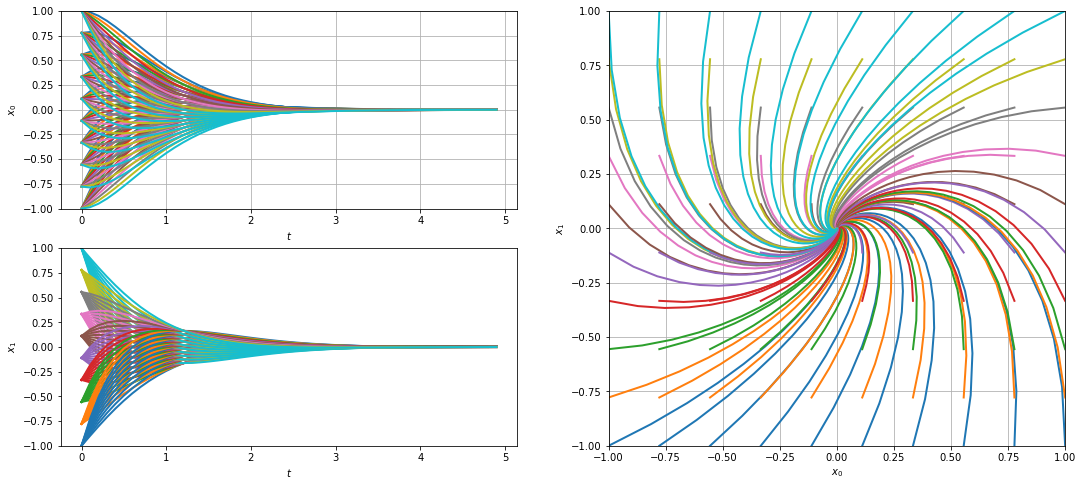

In [15]:
#definimos la ed
def focoat(t, x):
    return[
        -x[0]-x[1],
        x[0]-2*x[1]
    ]
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,10) for y0 in np.linspace(-1,1,10)]
dt = 0.1; tmax = 5; pars={}
solve_plot2D_multiple(focoat,pars,xini_array,tmax,dt,ranges=[[-1,1],[-1,1]],method='RK45')

## Punto Silla (Saddle)

en el caso en el que la matriz ${\bf A}$ tiene un autovalor positivo y el otro negativo tenemos un punto silla. Un ejemplo:

$\dot{x} = x+y$

$\dot{y} = x-2y$

La matriz en este caso es

${\bf A} =
\begin{pmatrix}
1 & 1\\
1 & -2
\end{pmatrix}
$

La traza es ahora $\tau=-1$ y el determinante es negativo $\Delta=-3$
Los autovalores: 1.3027 y -2.3027

SIEMPRE que el Determinante es negativo los autovalores son uno positivo y otro negativo porque estamos sumando y restando a $\tau$ un numero que es mayor a $\tau$ (la raiz del discriminante), por lo tanto tenemos un punto silla

In [16]:
av, xv = np.linalg.eig(np.array([[1,1],[1,-2]]))
print(av)

[ 1.30277564 -2.30277564]


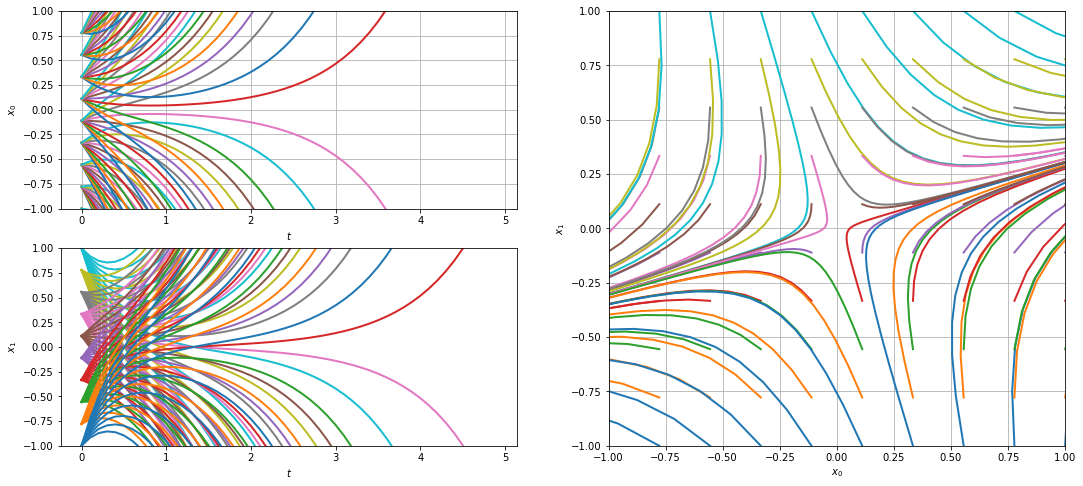

In [17]:
#definimos la ed
def saddle(t, x):
    return[
        x[0]+x[1],
        x[0]-2*x[1]
    ]
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,10) for y0 in np.linspace(-1,1,10)]
dt = 0.1; tmax = 5; pars={}
solve_plot2D_multiple(saddle,pars,xini_array,tmax,dt,ranges=[[-1,1],[-1,1]],method='RK45')

In [18]:
av, avec = np.linalg.eig(np.array([[1,1],[1,-2]]))
print('Primer autovalor y su autovector asociado')
print(av[0])
print(avec[:,0])
print('Segundo autovalor y su autovector asociado')
print(av[1])
print(avec[:,1])

Primer autovalor y su autovector asociado
1.3027756377319943
[0.95709203 0.28978415]
Segundo autovalor y su autovector asociado
-2.302775637731995
[-0.28978415  0.95709203]


 Los autovectores (columna) 
 
$
\begin{pmatrix}
0.9571 \\
0.2898
\end{pmatrix} 
\quad
\begin{pmatrix}
-0.2898\\
0.9571
\end{pmatrix} 
$

corresponden a los autovalores negativo (atraccion) y positivo (repulsor) y como vectores en el plano $(x,y)$ e indican las direcciones a lo largo de las cuales el flujo 2D es atraido y repelido respectivamente

## Nodo y Foco Repulsor
Cambiando el signo de los flujos de arriba  se pueden obtener un nodo y foco repulsor. Al cambiar el signo de $a,b,c,d$ cambia de signo la Traza pero no el Determinante. 

El signo de la traza es el que me da la estabilidad del nodo/foco. Traza negativa es estable y traza positiva es inestable

## Clasificacion de los sistemas lineales 

A partir de la Traza y el Determinante podemos clasificar los puntos fijos segun su tipo y estabilidad. 


In [19]:
def plot2D_linear_interactive(a,b,c,d,tmax,x0,y0):
    xini_array = [[xi,yi] for xi in np.linspace(-x0,x0,10) for yi in np.linspace(-y0,y0,10)]
    dt = tmax/100
    A = np.array([[a,b],[c,d]])
    solve_plot2D_linear(A,xini_array,tmax,dt,ranges=[[-x0,x0],[-y0,y0]],method='RK45')
    
iplot0 = interactive(plot2D_linear_interactive,
                    a=(-2,2,0.01), 
                    b=(-2,1,0.01), 
                    c=(-2,2,0.01), 
                    d=(-2,1,0.01), 
                    x0=(0,3,0.01), 
                    y0=(0,3,0.01), 
                    tmax=(1,3,0.01))

iplot0    

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0, step=0.01), FloatSlider(value…

## Centro

Para el caso particular en el que la parte real del autovalor se hace cero tenemos un centro, esto sucede para un valor especifico de parametros y no es generico como los puntos anteriores (o estructuralmente estable). Cualquier perturbacion de un centro me lleva a un foco atractor a uno repulsor. De hecho podemos ver al centro como el cambio de estabilidad de un foco repulsor a uno atractor. 

Un ejemplo clasico de un repulsor es el del oscilador armonico sin friccion

$\dot{x} = y$

$\dot{y} = -x$

La matriz en este caso es

${\bf A} =
\begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}
$

y tiene como autovalores: j y -j

In [20]:
av, _ = np.linalg.eig(np.array([[0,1],[-1,0]]))
print(av)

[0.+1.j 0.-1.j]


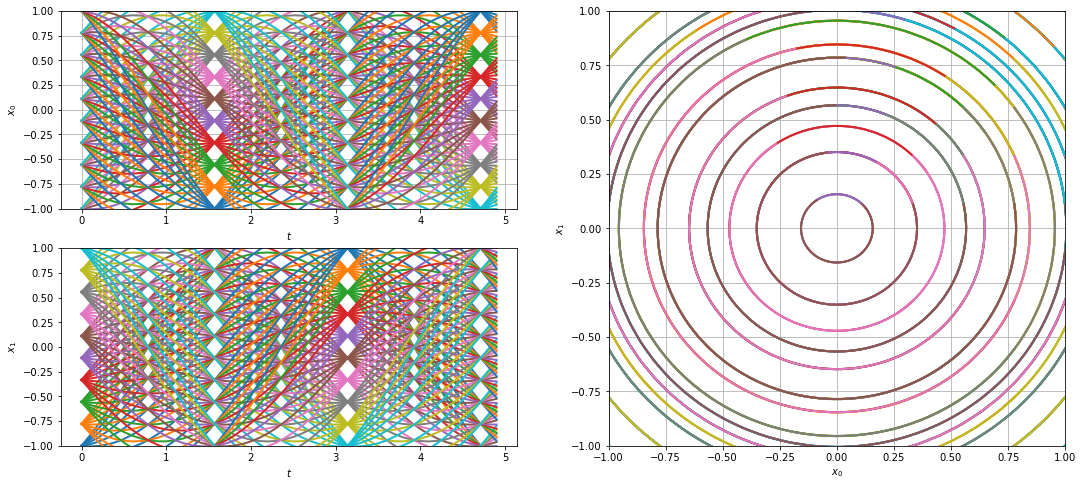

In [21]:
#definimos la ed
def saddle(t, x):
    return[
        x[1],
        -x[0]
    ]
# multiples trayectorias
xini_array = [[x0,y0] for x0 in np.linspace(-1,1,10) for y0 in np.linspace(-1,1,10)]
dt = 0.1; tmax = 5; pars={}
solve_plot2D_multiple(saddle,pars,xini_array,tmax,dt,ranges=[[-1,1],[-1,1]],method='RK45')

# Flujos2D, puntos fijos

Para el Flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

los puntos fijos seran aquellos que satisfacen simultaneamente

$f(x,y) = 0$

$g(x,y) = 0$

Cada una de estas ecuaciones se puede ver como la forma implicita de una curva en el plano $(x,y)$ y se conoce como *nulclina*. Podemos representar esas dos curvas en el plano (la nulclina de $\dot{x}=0$ y la nulclina de $\dot{y}=0$). Los puntos fijos estaran entonces en los puntos donde se corten estas dos curvas. Claramente para el caso lineal las nulclinas son dos rectas que de forma generica se cortan en solo un punto. 

Vamos a ver un sistema no lineal simple como ejemplo para un calculo simple de las nulclinas

$\dot{x} = a-y$

$\dot{y} = x^2-y$

En este caso la primera nulclina es una recta horizontal en $y=a$ y la segunda nulclina es una parabola en el origen $y=x^2$. Para $a>0$ tenemos dos puntos fijos en $(x_*=-\sqrt{a},y_*=a)$ y en $(x_*=\sqrt{a},y_*=a)$

In [22]:
def nodosilla2d(t, x, a):
    return[
        a-x[1],
        x[0]*x[0]-x[1]
    ]

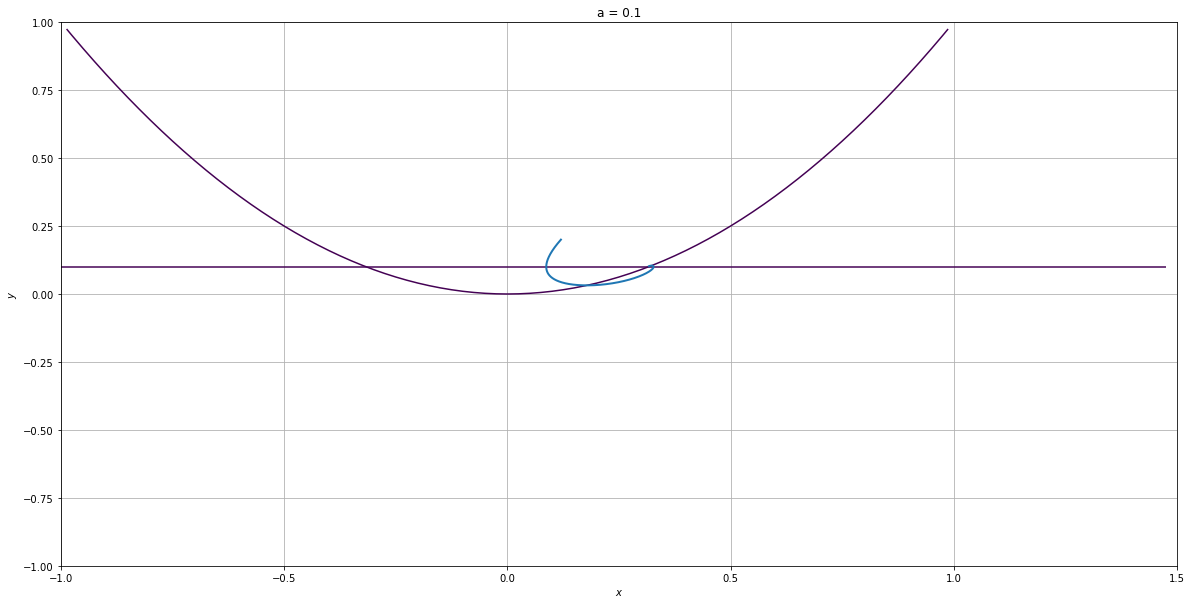

In [23]:
pars = {'a':0.1}
xini = [0.12,0.2]
tmax=10; dt = 0.001
solve_plot2D_nulclinas(nodosilla2d,pars,xini,tmax,dt,ranges=[[-1,1.5],[-1,1]])

In [24]:
def plot2D_nodosilla_interactive(a,x0,y0,tmax,xmax,ymax):
    pars = {'a':a}
    xini = [x0,y0]
    dt = tmax/100
    solve_plot2D_nulclinas(nodosilla2d,pars,xini,tmax,dt,ranges=[[-xmax,xmax],[-ymax,ymax]])

iplot1 = interactive(plot2D_nodosilla_interactive,
                    a=(-0.5,0.5,0.01), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(1,30,0.01),
                    xmax=(0,2),
                    ymax=(0,2))

iplot1    

interactive(children=(FloatSlider(value=0.0, description='a', max=0.5, min=-0.5, step=0.01), FloatSlider(value…

# Flujos 2D, Linealizacion, Estabilidad

Los puntos fijos pueden ser de forma feneral de tipo silla, nodo/foco atractor/repulsor o centros. Esto es porque MUY cerca (arbitrariamente cerca para ser mas precisos) del punto fijo el campo vector se puede aproximar como un sistema lineal, donde los coeficientes de la matriz $A$ son las derivadas (parciales) de las funciones $f$ y $g$ con respecto a las dos variables. Esto es:

${\bf A} =
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
$

tambien conocida como el *Jacobiano* del campo vector $[f,g]$

Por ejemplo para el caso anterior

$f(x,y) = a-y$

$g(x,y) = x^2-y$

Calculamos cada una de las derivadas

$\frac{\partial f}{\partial x}=0 \quad$  ya que $f$ no depende de x

$\frac{\partial f}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

$\frac{\partial g}{\partial x}=2x \quad$  la derivada de la funcion cuadratica $x^2$ es $2x$

$\frac{\partial g}{\partial y}=-1 \quad$  ya que la derivada de una funcion lineal es la pendiente

La matriz Jacobiana es entonces.

$
\begin{pmatrix}
0 & -1\\
2x & -1
\end{pmatrix}
$

esa matriz evaluada en los puntos fijos me dice como se comporta el flujo en un entorno local de los mismos. Por ejemplo en este caso para los puntos fijos la matriz va a ser

$
\begin{pmatrix}
0 & -1\\
-2\sqrt{a} & -1
\end{pmatrix}
$

para el punto fijo de la izquierda (x<0) y tiene determinante negativo asi que es un punto silla para todos los valores de $a>0$.

Y para el punto fijo de la derecha la matriz sera:

$
\begin{pmatrix}
0 & -1\\
2\sqrt{a} & -1
\end{pmatrix}
$

que tiene determinante positivo y traza negativa asi que es un atractor (dependiendo del valor de $a$ puede ser un foco o un nodo. 

# Bifurcacion Saddle-Node en el plano

Viendo el caso anterior se puede inferir que lo que sucede a medida que $a$ se aproxima a cero por los positivos es que los dos puntos fijos (un nodo atractor y un punto silla) se van acercando y para $a=0$ colapsan y se produce una bifurcacion de nodo-silla en el plano

# Bifurcacion de Hopf
la proxima...